### Pair Programming II: Preprocesado

Usando el mismo dataset que usatéis ayer, los objetivos de los ejercicios de hoy son:
- Estandarizar las variables numéricas de vuestro set de datos
- Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.
- Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.
- Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

In [25]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import RobustScaler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)


In [26]:
df = pd.read_pickle('data/airline_limpio.pkl')
df.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,satisfied,Female,Loyal Customer,46,Business travel,Business,1777,5,5,5,5,2,3,4,5,5,5,5,3,5,3,0
1,dissatisfied,Female,Loyal Customer,54,Business travel,Business,1078,3,2,2,2,3,4,4,3,3,3,3,2,3,2,0


Vamos a estandarizar las variables numéricas (vamos a usar Robust porque no hemos gestionado outliers):

In [27]:
robust = RobustScaler()

numericas = df.select_dtypes(include= np.number)

numericas_robust = pd.DataFrame(robust.fit_transform(numericas), columns = numericas.columns)

for col in numericas_robust.columns:
    df[col] = numericas_robust[col]

In [28]:
df.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,satisfied,Female,Loyal Customer,0.250000,Business travel,Business,-0.122137,5,5,5,5,2,3,4,5,5,5,5,3,5,3,0.0
1,dissatisfied,Female,Loyal Customer,0.583333,Business travel,Business,-0.715013,3,2,2,2,3,4,4,3,3,3,3,2,3,2,0.0


Vamos a ver ahora el orden de las categóricas:

In [29]:
#Vamos a abrir de nuevo también el df sin estandarizar para después poder comparar varios modelos:
df2 = pd.read_pickle('data/airline_limpio.pkl')
df2.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,satisfied,Female,Loyal Customer,46,Business travel,Business,1777,5,5,5,5,2,3,4,5,5,5,5,3,5,3,0
1,dissatisfied,Female,Loyal Customer,54,Business travel,Business,1078,3,2,2,2,3,4,4,3,3,3,3,2,3,2,0


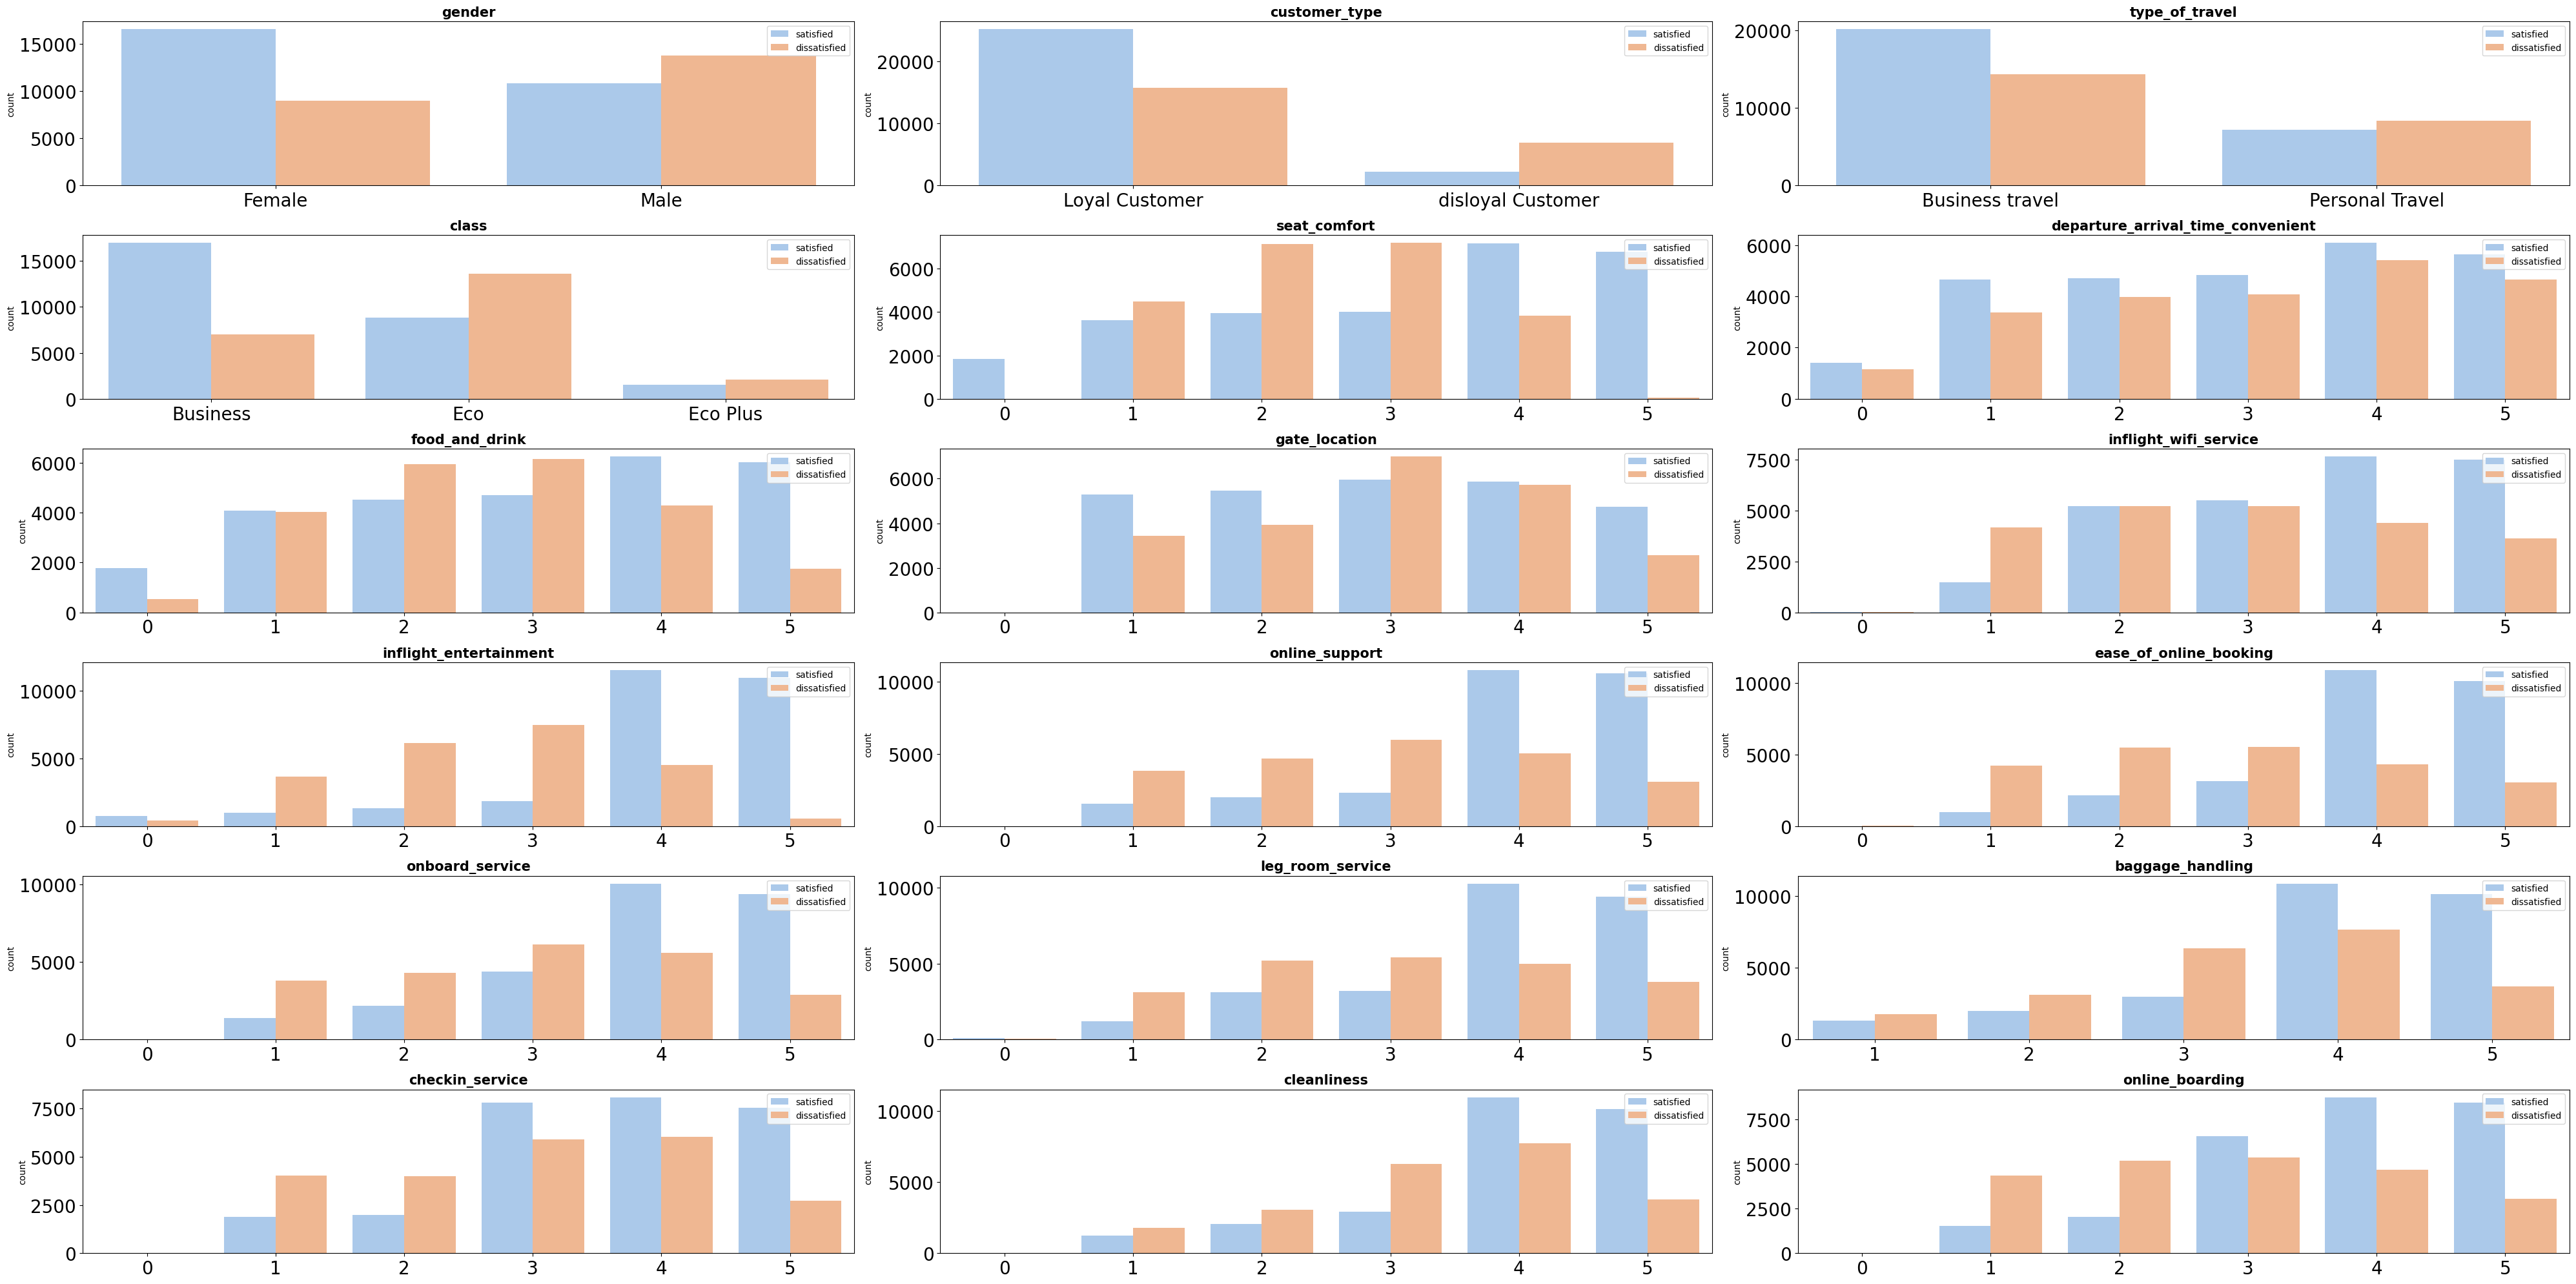

In [30]:
# Vamos a recordar la distribución de las categóricas en función de la VR que vimos en el EDA:

fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (40, 20))

axes = axes.flat
columnas_cat = df.select_dtypes(include = ["O", "category"]).columns[1:]

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaction",
        palette= "pastel", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();

Parece que, en general, todas tendrían orden a excepción de: "departure_arrvial_time_convenient".

Vamos a ver el orden del resto de variables:
- 'gender': {'Female': 1, 'Male': 0}
- 'customer_type': {'Loyal Customer': 1, 'disloyal Customer': 0}
- 'type_of_travel': {'Business travel': 1, 'Personal Travel': 0}
- 'class': {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
- 'seat_comfort': {0: 2, 1: 1, 2: 0, 3: 0, 4: 3, 5: 4}
- 'food_and_drink': {0: 2, 1: 1, 2: 0, 3: 0, 4: 3, 5: 4}
- 'gate_location': {0: 1, 1: 2, 2: 2, 3: 0, 4: 1, 5: 3}
- 'inflight_wifi_service': {0: 1, 1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
- 'inflight_entertainment': {0: 3, 1: 2, 2: 1, 3: 0, 4: 4, 5: 5}
- 'online_support': {0: 1, 1: 0, 2: 0, 3: 0, 4: 2, 5: 3}
- 'ease_of_online_booking': {0: 3, 1: 0, 2: 1, 3: 2, 4: 4, 5: 5}
- 'onboard_service': {0: 3, 1: 0, 2: 1, 3: 2, 4: 4, 5: 5}
- 'leg_room_service: {0: 2, 1: 0, 2: 1, 3: 1, 4: 3, 5: 3}
- 'baggage_handling': {1: 2, 2: 1, 3: 0, 4: 3, 5: 4}
- 'checkin_service': {0: 1, 1: 0, 2: 0, 3: 2, 4: 2, 5: 3}
- 'cleanliness': {0: 2, 1: 1, 2: 1, 3: 0, 4: 3, 5: 4}
- 'online_boarding': {0: 2, 1: 1, 2: 0, 3: 3, 4: 4, 5: 5}

In [32]:
dict_map = {'satisfaction': {'satisfied': 1, 'dissatisfied': 0},
'gender': {'Female': 1, 'Male': 0},
'customer_type': {'Loyal Customer': 1, 'disloyal Customer': 0},
'type_of_travel': {'Business travel': 1, 'Personal Travel': 0},
'class': {'Business': 0, 'Eco': 1, 'Eco Plus': 2},
'seat_comfort': {0: 2, 1: 1, 2: 0, 3: 0, 4: 3, 5: 4},
'food_and_drink': {0: 2, 1: 1, 2: 0, 3: 0, 4: 3, 5: 4},
'gate_location': {0: 1, 1: 2, 2: 2, 3: 0, 4: 1, 5: 3},
'inflight_wifi_service': {0: 1, 1: 0, 2: 1, 3: 2, 4: 3, 5: 4},
'inflight_entertainment': {0: 3, 1: 2, 2: 1, 3: 0, 4: 4, 5: 5},
'online_support': {0: 1, 1: 0, 2: 0, 3: 0, 4: 2, 5: 3},
'ease_of_online_booking': {0: 3, 1: 0, 2: 1, 3: 2, 4: 4, 5: 5},
'onboard_service': {0: 3, 1: 0, 2: 1, 3: 2, 4: 4, 5: 5},
'leg_room_service': {0: 2, 1: 0, 2: 1, 3: 1, 4: 3, 5: 3},
'baggage_handling': {1: 2, 2: 1, 3: 0, 4: 3, 5: 4},
'checkin_service': {0: 1, 1: 0, 2: 0, 3: 2, 4: 2, 5: 3},
'cleanliness': {0: 2, 1: 1, 2: 1, 3: 0, 4: 3, 5: 4},
'online_boarding': {0: 2, 1: 1, 2: 0, 3: 3, 4: 4, 5: 5}}

In [33]:
for col in dict_map.keys():
    df[col] = df[col].map(dict_map[col])

In [34]:
for col in dict_map.keys():
    df2[col] = df2[col].map(dict_map[col])

In [35]:
df.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,1,1,1,0.250000,1,0,-0.122137,4,5,4,3,1,0,2,5,5,3,4,2,4,3,0.0
1,0,1,1,0.583333,1,0,-0.715013,0,2,0,2,2,4,2,2,2,1,0,0,0,0,0.0


In [36]:
df2.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,1,1,1,46,1,0,1777,4,5,4,3,1,0,2,5,5,3,4,2,4,3,0
1,0,1,1,54,1,0,1078,0,2,0,2,2,4,2,2,2,1,0,0,0,0,0


Vamos a hacer ahora el get_dummies de "departure_arrival_time_convenient":

In [37]:
dummies = pd.get_dummies(df["departure_arrival_time_convenient"], prefix_sep = "_", prefix = "dep_conv", dtype = int)
df = pd.concat([df, dummies], axis= 1)
df.drop("departure_arrival_time_convenient", axis= 1, inplace= True)

In [38]:
dummies = pd.get_dummies(df2["departure_arrival_time_convenient"], prefix_sep = "_", prefix = "dep_conv", dtype = int)
df2 = pd.concat([df2, dummies], axis= 1)
df2.drop("departure_arrival_time_convenient", axis= 1, inplace= True)

In [39]:
df.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,dep_conv_0,dep_conv_1,dep_conv_2,dep_conv_3,dep_conv_4,dep_conv_5
0,1,1,1,0.250000,1,0,-0.122137,4,4,3,1,0,2,5,5,3,4,2,4,3,0.0,0,0,0,0,0,1
1,0,1,1,0.583333,1,0,-0.715013,0,0,2,2,4,2,2,2,1,0,0,0,0,0.0,0,0,1,0,0,0


In [40]:
df2.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,dep_conv_0,dep_conv_1,dep_conv_2,dep_conv_3,dep_conv_4,dep_conv_5
0,1,1,1,46,1,0,1777,4,4,3,1,0,2,5,5,3,4,2,4,3,0,0,0,0,0,0,1
1,0,1,1,54,1,0,1078,0,0,2,2,4,2,2,2,1,0,0,0,0,0,0,0,1,0,0,0


Lo guardamos:

In [ ]:
df.to_pickle('data/airline_estand_encod.pkl')

In [ ]:
df2.to_pickle('data/airline_encod.pkl')